# Model test를 위해 이미지와 ground truth를 생성
### input
/content/drive/Shareddrives/machine_learning_in_practice/한국어 글자체 이미지/hand_writing_unzip/1_sentence <br>
> 임의의 3개 문장 추출<br>


/content/drive/Shareddrives/machine_learning_in_practice/img_file<br>
> 임의의 3이미지 선택

### output
> test_data -> 합성된 이미지 (10000, 5000) gray(0~1)<br>
> gound truth -> csv 형태로 (id, class, x_min, x_max, y_min, y_max) * n개 <br>
class 0 => sentence_img<br>
class 1 => drawing_img

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Select Img and Sentence

In [4]:
import os
import sys
import random
import cv2
import numpy as np

sentence_path = "/content/drive/Shareddrives/machine_learning_in_practice/한국어 글자체 이미지/hand_writing_unzip/1_sentence"
img_path      = "/content/drive/Shareddrives/machine_learning_in_practice/img_file"
sentence_list = os.listdir(sentence_path)
img_list      = os.listdir(img_path)

print("""File list""")
print(sentence_list); print(img_list)

File list
['00103279.png', '00103286.png', '00103258.png', '00103271.png', '00103291.png', '00103314.png', '00103288.png', '00103297.png', '00103304.png', '00103315.png', '00103294.png', '00103310.png', '00103317.png', '00103289.png', '00103311.png', '00103301.png', '00103318.png', '00103303.png', '00103292.png', '00103306.png', '00103293.png', '00103290.png', '00103316.png', '00103309.png', '00103312.png', '00103307.png', '00103313.png', '00103305.png', '00103299.png', '00103295.png', '00103287.png', '00103302.png', '00103308.png', '00103296.png', '00103298.png', '00103319.png', '00103332.png', '00103345.png', '00103321.png', '00103328.png', '00103338.png', '00103329.png', '00103336.png', '00103334.png', '00103333.png', '00103324.png', '00103340.png', '00103349.png', '00103331.png', '00103327.png', '00103347.png', '00103350.png', '00103323.png', '00103342.png', '00103325.png', '00103346.png', '00103348.png', '00103335.png', '00103351.png', '00103343.png', '00103322.png', '00103337.png

In [7]:
NUM_OF_SENTENCE = 3
NUM_OF_IMG      = 3

random.seed(5125)
added_sentences = random.sample(sentence_list, NUM_OF_SENTENCE)
added_img       = random.sample(img_list, NUM_OF_IMG)
sentence_path= sentence_path.replace('한국어 글자체 이미지', "한국어\ 글자체\ 이미지")
added_sentences_path = [sentence_path+'/'+file_name for file_name in added_sentences]
added_img_path       = [img_path+'/'+file_name for file_name in added_sentences]

# 파싱

In [111]:
import json
sentence_meta_data_path = '/content/drive/Shareddrives/machine_learning_in_practice/한국어 글자체 이미지/01.손글씨/handwriting_data_info1.json'

with open(sentence_meta_data_path) as raw_data:
  raw_json  = json.load(raw_data)
  raw_sentence_list = [x for x in raw_json['images'] if x["file_name"] in added_sentences]
  y_without_size_str = [(sentence['id'], 0, sentence['width'], sentence['height']) for sentence in raw_sentence_list]

print("id, class, x_size, y_size")
print(y_without_size)

id, class, x_size, y_size
[('00068209', 0, 3668, 188), ('00074975', 0, 3671, 188), ('00103087', 0, 3606, 183)]


#import sentecne_img and img 

/content/drive/Shareddrives/machine_learning_in_practice/한국어 글자체 이미지/hand_writing_unzip/1_sentence/00103087.png
shape : (183, 3606), dtype : uint8


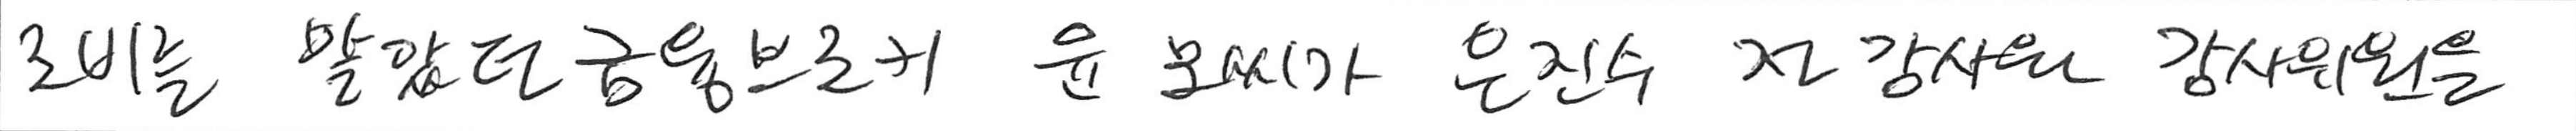

/content/drive/Shareddrives/machine_learning_in_practice/한국어 글자체 이미지/hand_writing_unzip/1_sentence/00074975.png
shape : (188, 3671), dtype : uint8


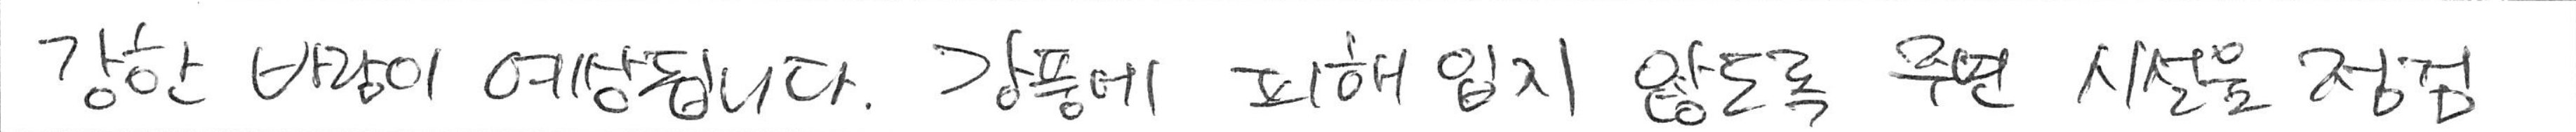

/content/drive/Shareddrives/machine_learning_in_practice/한국어 글자체 이미지/hand_writing_unzip/1_sentence/00068209.png
shape : (188, 3668), dtype : uint8


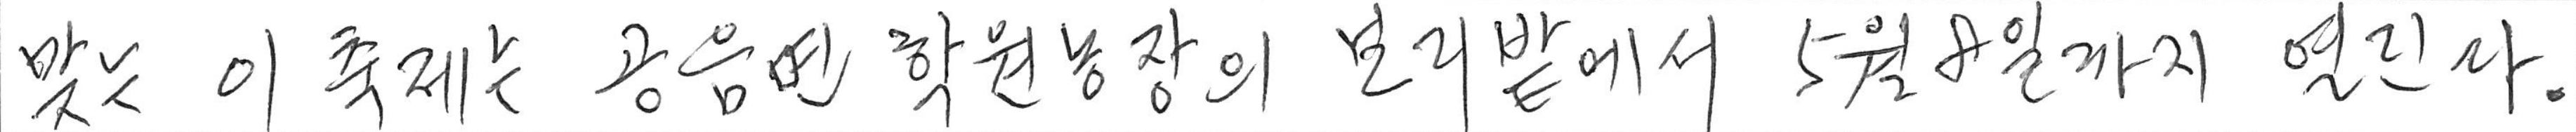

In [11]:
from google.colab.patches import cv2_imshow
for path in added_sentences_path:
  print(path)
  img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  print(f"shape : {img.shape}, dtype : {img.dtype}")
  cv2_imshow(img)

In [8]:
PAGE_X_SIZE = 10000
PAGE_Y_SIZE = 5000
raw_img = np.zeros((X_SIZE, Y_SIZE))

In [99]:
# 겹치지 않게 x_min, y_min, x_max, y_max를 부여 해야 함.

def random_coordinate_generator(img:np.ndarray):
  x_size = img.shape[0]
  y_size = img.shape[1]
  x_min = random(range(0, PAGE_X_SIZE - x_size), 1)
  y_min = random(range(0, PAGE_Y_SIZE - y_size), 1)
  x_max = x_min + x_size
  y_max = y_min + y_size
  return x_min, y_min, x_max, y_max

def put_image_overlab(field:np.ndarray, push:np.ndarray, x_min:int, y_min:int):
  field[]

# 10번 넣어봐

/bin/bash: /content/drive/Shareddrives/machine_learning_in_practice/한국어 글자체 이미지/hand_writing_unzip/1_sentence/00103087.png: Permission denied


TypeError: ignored

In [ ]:
def draw_bounding_box(image:np.ndarray):
  return